## 📌 Project Introduction:
Breast cancer is one of the most prevalent and life-threatening diseases affecting millions worldwide. Early detection and accurate classification of breast tumors can significantly improve treatment outcomes and survival rates. This project aims to develop a machine learning-based breast cancer prediction model that can classify tumors as benign (non-cancerous) or malignant (cancerous) based on their characteristics.

The project utilizes a structured dataset containing tumor attributes, such as radius, texture, perimeter, smoothness, compactness, symmetry, and concavity. These features play a crucial role in determining the nature of the tumor. The dataset is preprocessed to handle missing values, scale numerical features, and remove outliers, ensuring a clean and robust input for machine learning models.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('breast-cancer.csv')

In [3]:
data

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

### Domain Analysis

1 Diagnosis : The target variable, which indicates whether the breast cancer is:
   - M: Malignant (cancerous and more dangerous).
   - B: Benign (non-cancerous).
2. Radius (mean, worst) : Represents the mean and worst distance from the center of the tumor to its edge (tumor size).
3. Texture (mean, worst) : Measures the variation in grayscale levels within the tumor.
4. Perimeter (mean, worst) : Measures the boundary length of the tumor.
5. Area (mean, worst): The total area covered by the tumor.
6. Smoothness (mean, worst): How smooth the tumor’s edges are.
7. Compactness (mean, worst) : It relates to the tumor's perimeter² / area, indicating how closely packed it is.
8. Concavity (mean, worst) : Measures the severity of indentations on the tumor surface.
9. Concave points (mean, worst) : The number of concave portions on the tumor boundary.
10. Symmetry (mean, worst) : Indicates how symmetrical the tumor is.
11. Fractal Dimension (mean, worst): Quantifies the complexity of the tumor’s boundary.

#### Basic Operations

In [4]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [7]:
data.duplicated().sum()

0

In [8]:
data.shape

(569, 32)

In [9]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#### Exploratory Data Anylysis

In [10]:
data.head(1)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302         M        17.99         10.38           122.8     1001.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           0.1184            0.2776          0.3001               0.1471   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33            184.6      2019.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                   0.1189  

[1 rows x 32 columns]

In [11]:
data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

### Univariate analysis using sweetviz

In [12]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [13]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

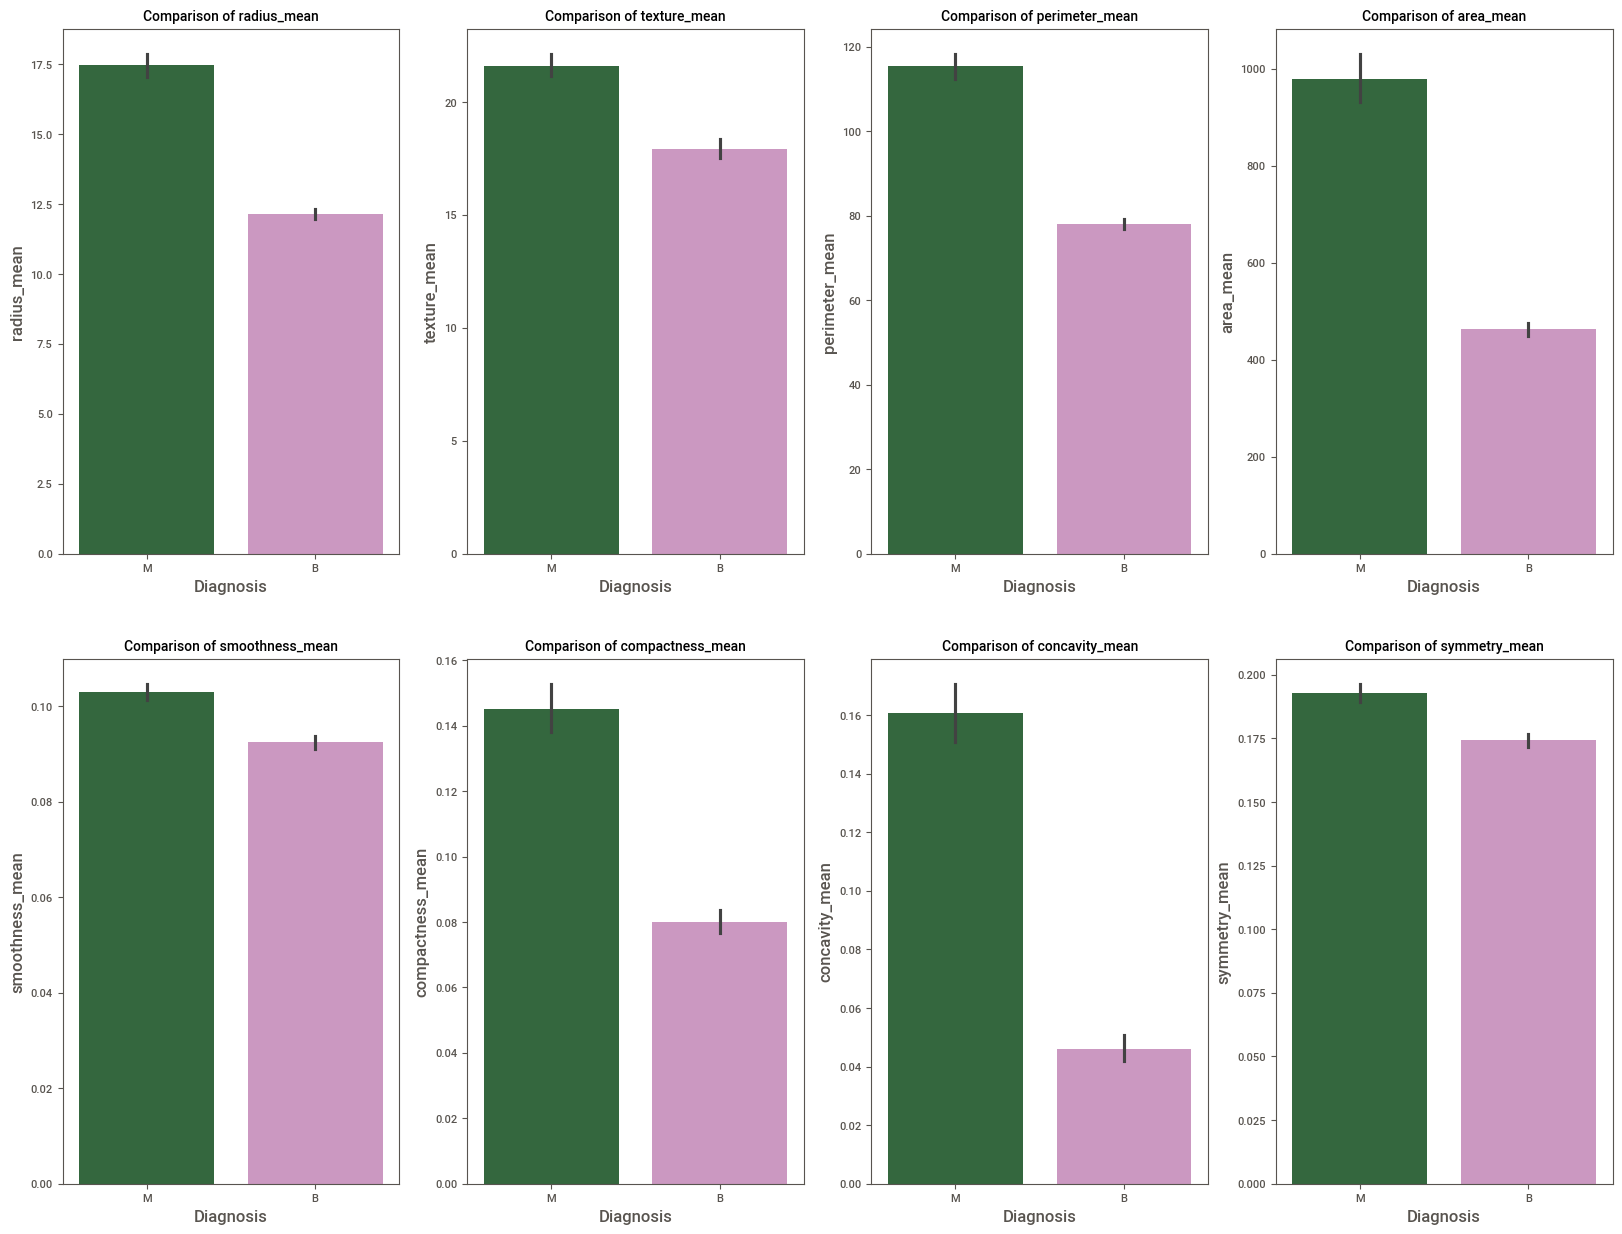

In [14]:
num_columns = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", 
               "smoothness_mean", "compactness_mean", "concavity_mean", "symmetry_mean"]
plt.figure(figsize=(20,15))
for i, column in enumerate(num_columns):
    plt.subplot(2,4,i+1)  
    sns.barplot(x='diagnosis', y=column, data=data, palette='cubehelix')
    plt.title(f'Comparison of {column}', fontsize=10)
    plt.xlabel('Diagnosis', fontsize=12)
    plt.ylabel(column, fontsize=12)

### Insight

1.radius_mean:
 . Malignant tumors likely have a larger mean radius than benign tumors, indicating that malignant tumors tend to be bigger.

2.texture_mean:
 .The texture of malignant tumors may show more irregularity (lower mean texture values) compared to benign ones, which might have smoother textures.

3.perimeter_mean:
 .Like radius_mean, malignant tumors may have a larger perimeter, which suggests that they are not only bigger but also more irregular in shape.

4.area_mean:
 .Malignant tumors could have a larger mean area, indicating that they occupy more space than benign tumors.

5.smoothness_mean:
 .Benign tumors are likely to have smoother cell borders, whereas malignant tumors may have more rough or irregular borders.

6.compactness_mean:
 .Benign tumors may have more compact shapes (low compactness), while malignant tumors are likely to have less compact shapes (higher compactness), showing more irregularity.

7.concavity_mean:
 .Malignant tumors typically show a greater concavity (more indentations), which is a common feature of irregularly shaped malignant tumors.

8.symmetry_mean:
 .Benign tumors are likely to be more symmetric, whereas malignant tumors may show more asymmetry due to their irregular and complex shapes.

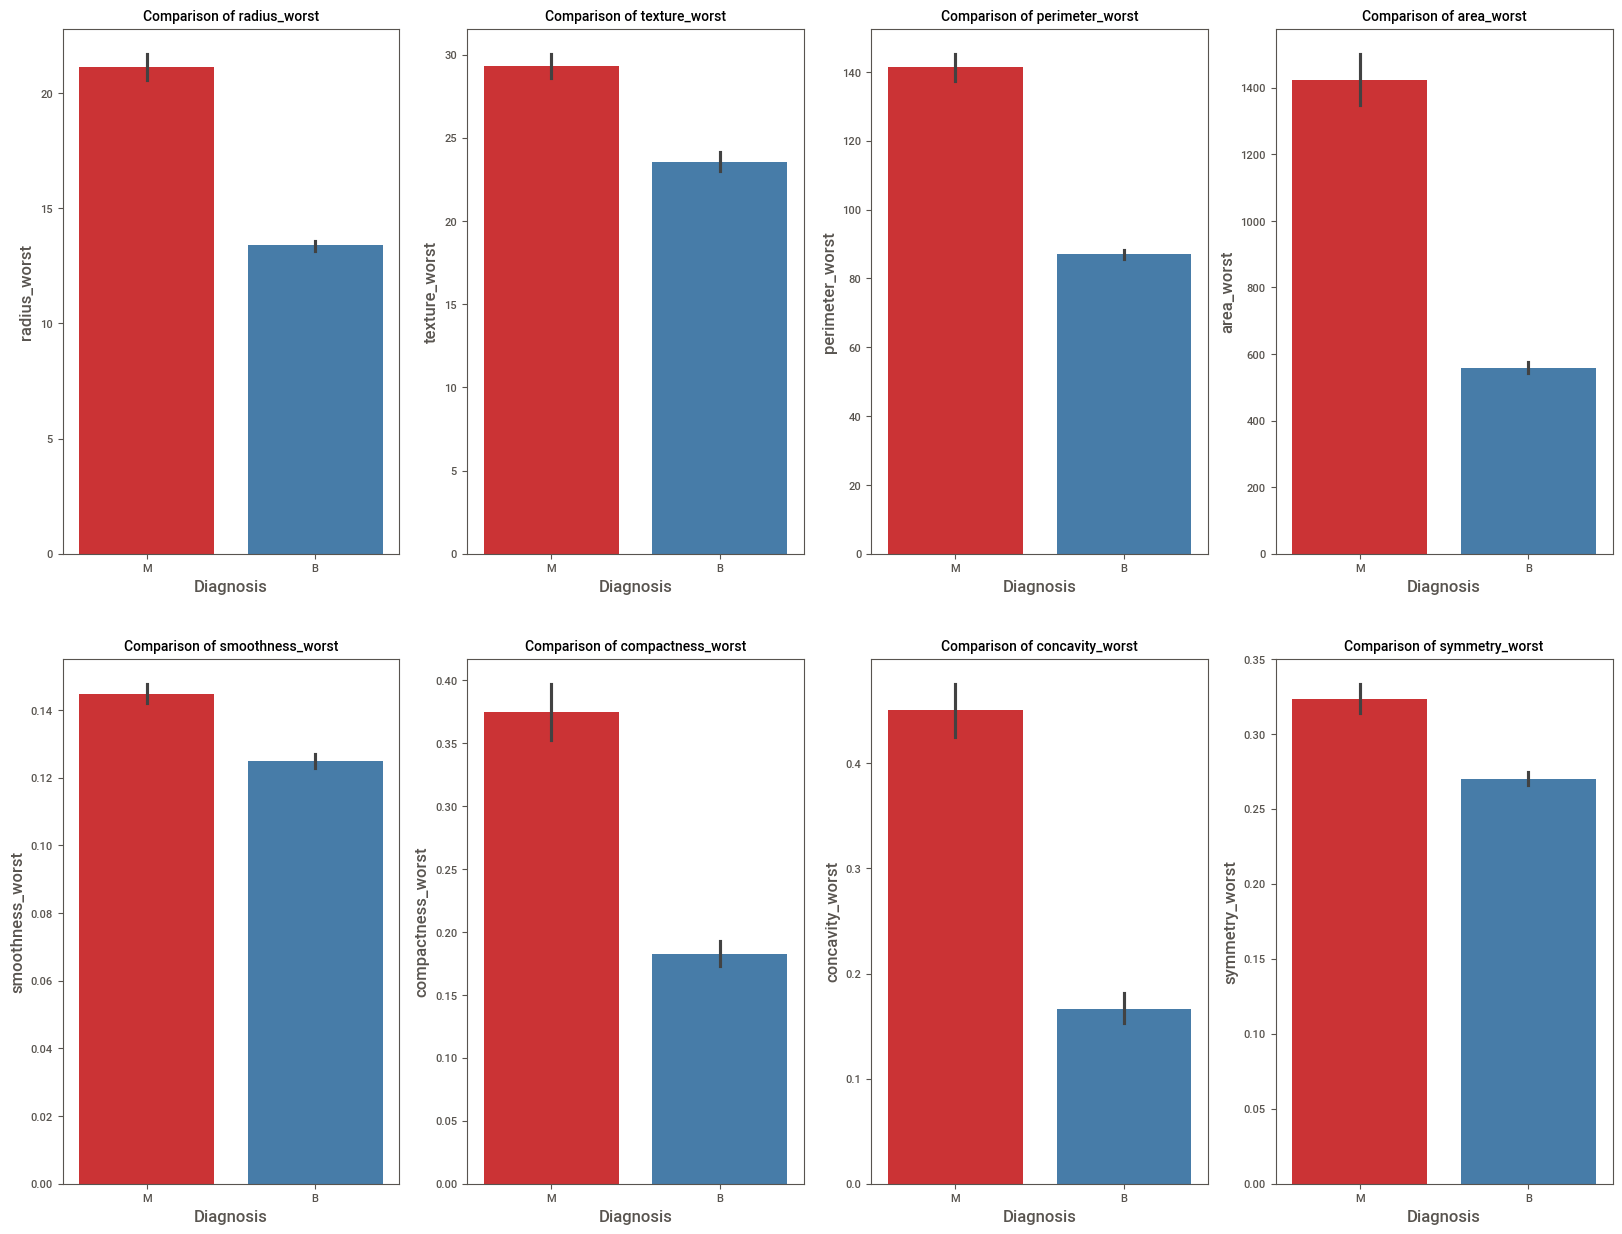

In [15]:
num_columns = ["radius_worst", "texture_worst", "perimeter_worst", "area_worst", 
               "smoothness_worst", "compactness_worst", "concavity_worst", "symmetry_worst"]
plt.figure(figsize=(20,15))
for i, column in enumerate(num_columns):
    plt.subplot(2, 4, i+1)  
    sns.barplot(x='diagnosis', y=column, data=data, palette='Set1')
    plt.title(f'Comparison of {column}', fontsize=10)
    plt.xlabel('Diagnosis', fontsize=12)
    plt.ylabel(column, fontsize=12)

### Insight

1.radius_worst:
 .Malignant tumors are likely to have a larger radius compared to benign tumors. This indicates that malignant tumors tend to be larger and more irregular.

2.texture_worst:
 .Malignant tumors may show a more irregular texture (lower mean texture), while benign tumors might have smoother textures.

3.perimeter_worst:
 .Similar to radius_worst, malignant tumors are expected to have a larger perimeter, indicating they are not only larger but also more irregular in shape.

4.area_worst:
 .Malignant tumors likely have a larger area, suggesting that malignant tumors tend to occupy more space than benign tumors.

5.smoothness_worst:
 .Benign tumors typically have smoother cell borders, while malignant tumors might have more rough or jagged borders, suggesting irregularity.

6.compactness_worst:
 .Benign tumors are often more compact, while malignant tumors may appear less compact, indicating more irregular and complex shapes.

7.concavity_worst:
 .Malignant tumors are likely to have greater concavity (more indentations), which is a common characteristic of irregularly shaped malignant tumors.

8.symmetry_worst:
 .Malignant tumors tend to have lower symmetry, meaning they are more asymmetric, which is a typical trait of cancerous tumors compared to more symmetrical benign ones.

### Biavariant Analysis

#### Checking relationship of all variables with respect to target variable

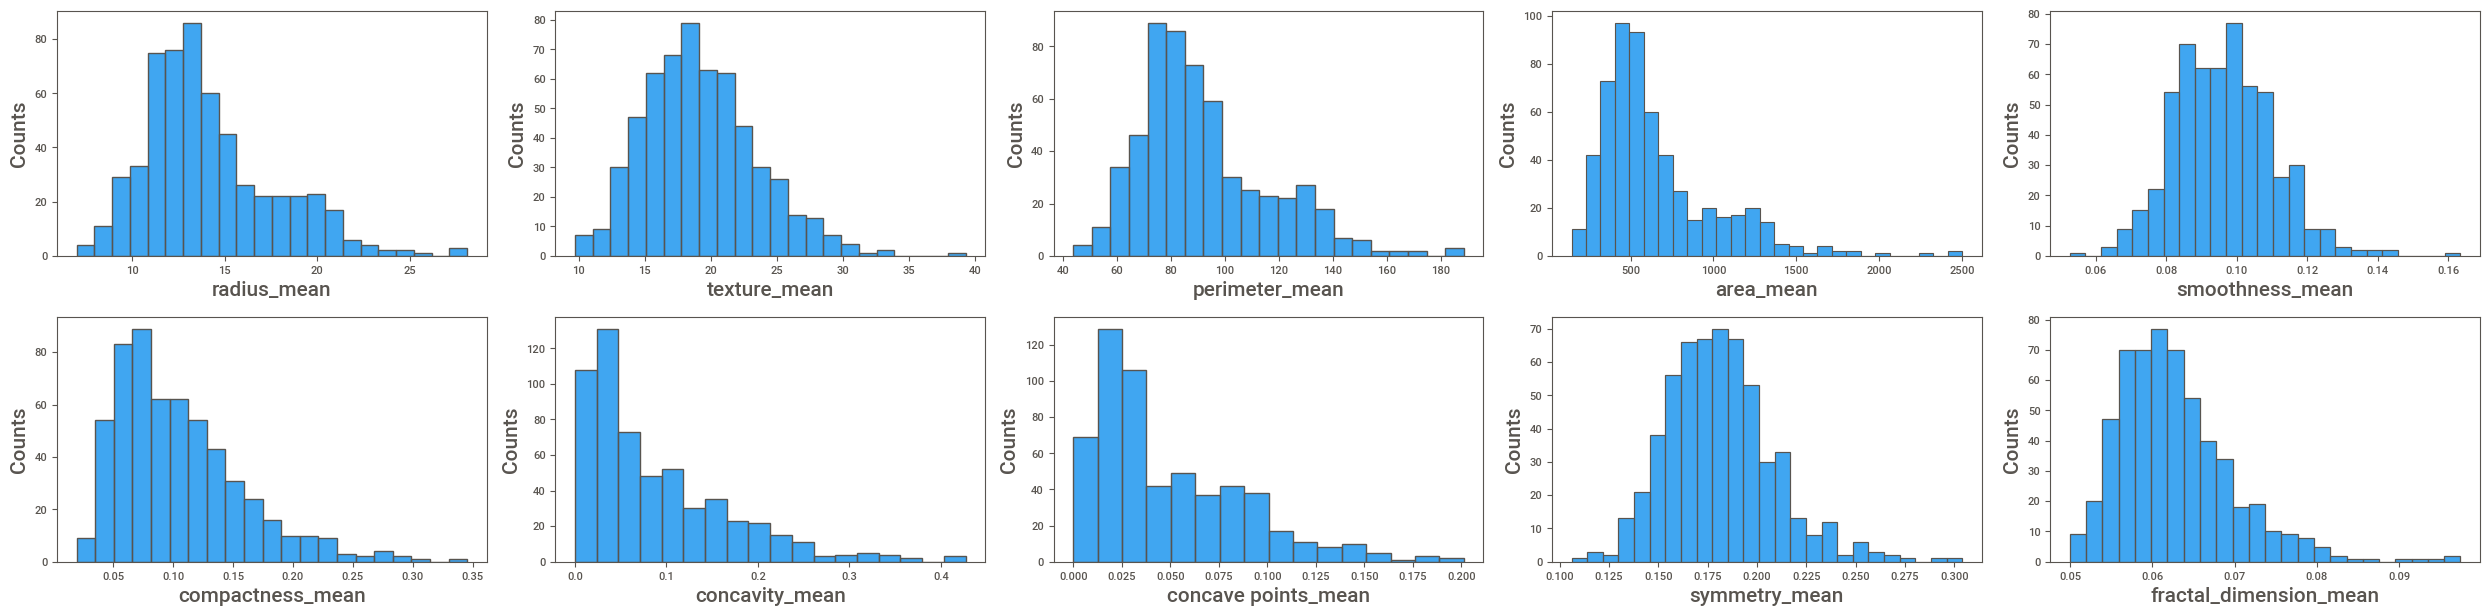

In [16]:
num_columns = ["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean",
               "concave points_mean","symmetry_mean","fractal_dimension_mean"]
plt.figure(figsize=(25,15),facecolor='white')
plotnumber=1
for i in num_columns:
    if plotnumber<=10:
        plt.subplot(5,5,plotnumber)
        sns.histplot(data[i])
        plt.xlabel(i,fontsize=15)
        plt.ylabel('Counts',fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

### Insight

1.radius_mean:
 .It may have a right-skewed distribution (positively skewed), with most of the samples having a smaller radius and a few extreme values representing larger tumors. A large mean radius can be a key indicator for malignancy.

2.texture_mean;
 .This histogram may be approximately normal or slightly skewed, showing whether most samples have a rough or smooth texture. Malignant tumors often have more irregular textures.

3.perimeter_mean:
 .Similar to radius_mean, this feature could be right-skewed as well, with a higher concentration of smaller values. Malignant tumors may show larger perimeters.

4.area_mean:
 .This feature is often right-skewed, indicating that most benign tumors have a smaller area, with a few large areas potentially corresponding to malignant cases.

5.smoothness_mean:
 .The histogram of this feature may be normally distributed, with benign tumors generally exhibiting smoother edges and malignant tumors showing more irregular borders.

6.compactness_mean:
 .The distribution might show a right-skewed pattern, with more benign samples having more compact (regular) shapes, while malignant tumors are often more irregular.

7.concavity_mean:
 .The distribution of concavity_mean may be right-skewed (positively skewed). Most of the samples (especially benign tumors) may have a lower concavity value, while malignant tumors may have higher concavity values.

8.concave points_mean:
 .This feature represents the number of concave points (indentations) in the cell's boundary. The distribution may also be right-skewed, with malignant tumors showing more concave points.

9.symmetry_mean:
 .The symmetry of the tumor's shape will likely show a normal or slightly skewed distribution. Benign tumors may have higher symmetry, while malignant tumors tend to be more irregular (lower symmetry).

10.fractal_dimension_mean:
 .This measures how rough or irregular the boundary of the tumor is. It could have a right-skewed distribution. Higher fractal dimension values are often found in malignant tumors due to their more complex, jagged boundaries.

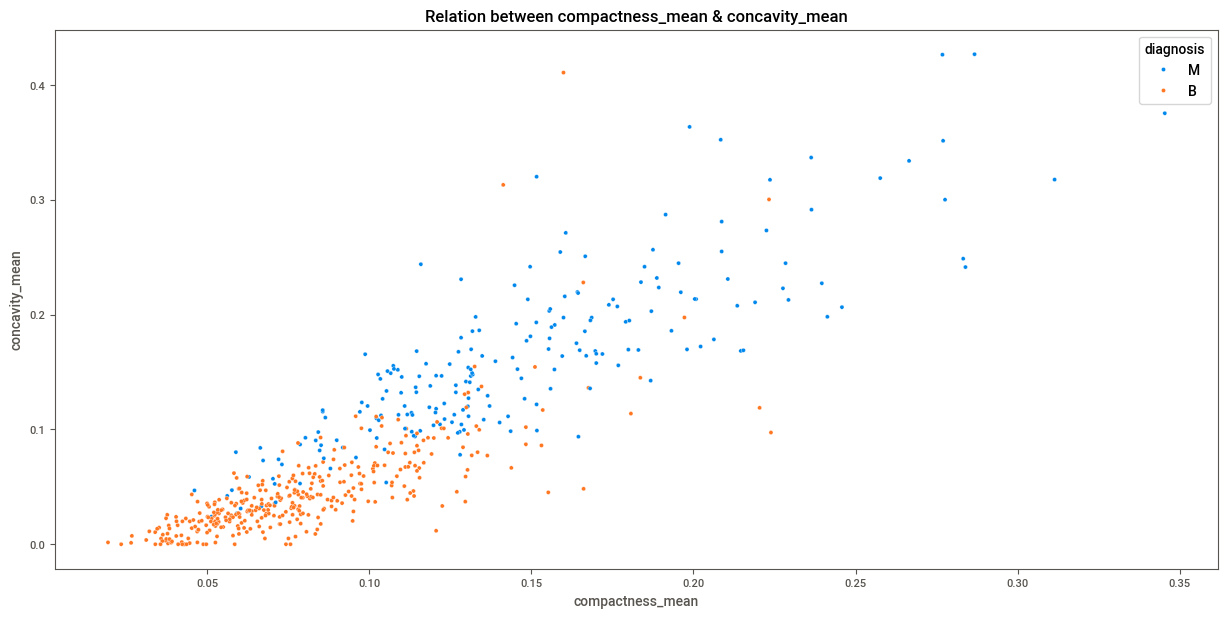

In [17]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='compactness_mean',y='concavity_mean',data=data, hue='diagnosis')
plt.title('Relation between compactness_mean & concavity_mean')
plt.show()

The relationship between compactness and concavity shows that malignant tumors are often larger and more irregular compared to benign tumors.

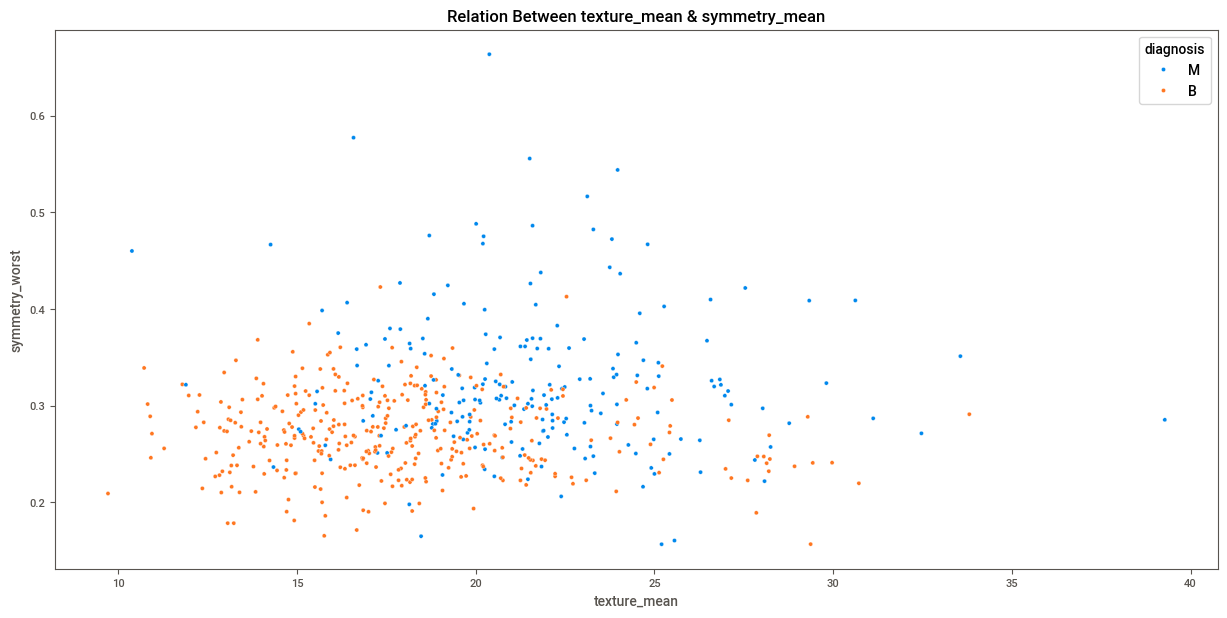

In [18]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='texture_mean',y='symmetry_worst',data=data,hue='diagnosis')
plt.title('Relation Between texture_mean & symmetry_mean')
plt.show()

Malignant tumors generally show rougher textures and asymmetrical shapes (lower symmetry), while benign tumors tend to be smoother and more symmetrical.

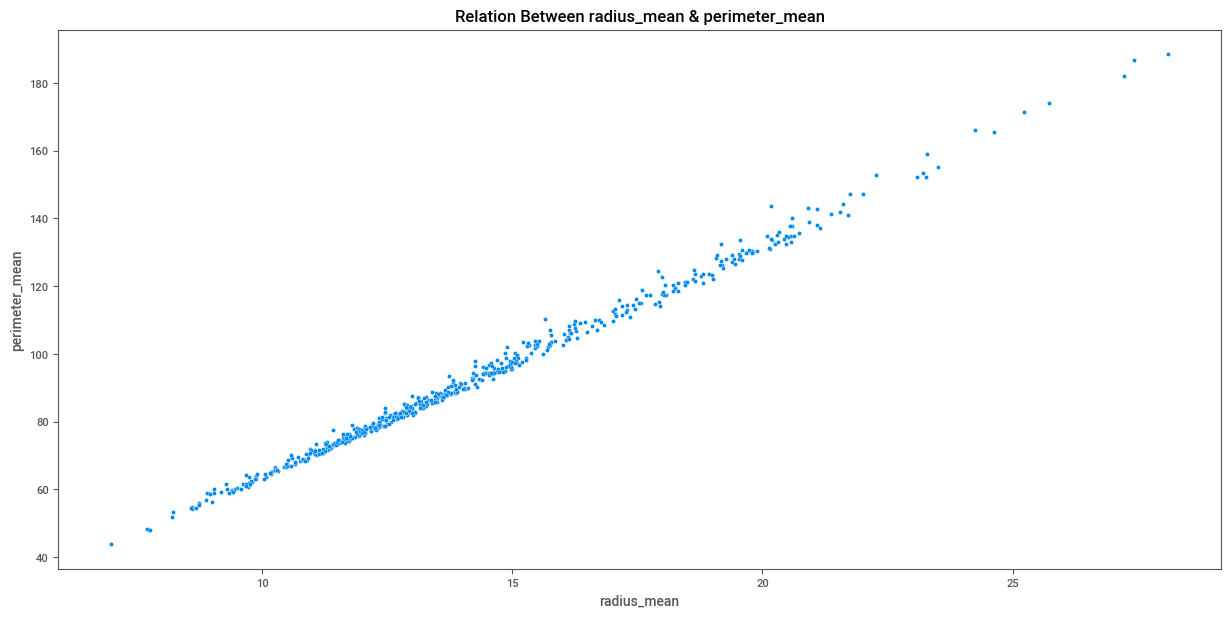

In [19]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='radius_mean',y='perimeter_mean',data=data)
plt.title('Relation Between radius_mean & perimeter_mean')
plt.show()

The scatter plot shows that as the radius of the tumor increases, the perimeter also increases. This suggests that tumors with a larger size tend to have a larger perimeter.

In [20]:
print(data['diagnosis'].value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64


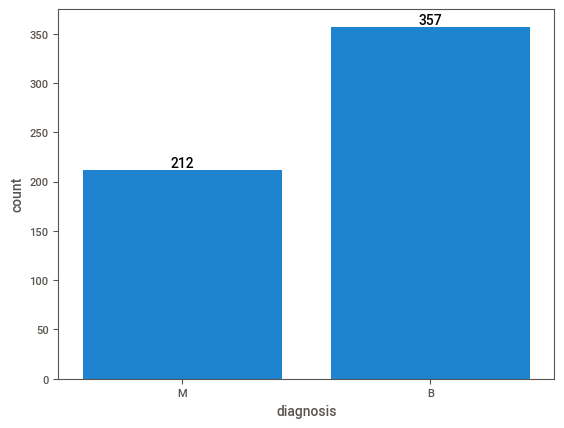

In [21]:
ax = sns.countplot(x = 'diagnosis',data = data)
for bars in ax.containers:
    ax.bar_label(bars)

In [22]:
data_mean = data[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

In [23]:
data_worst = data[['diagnosis', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

<Figure size 2000x2000 with 0 Axes>

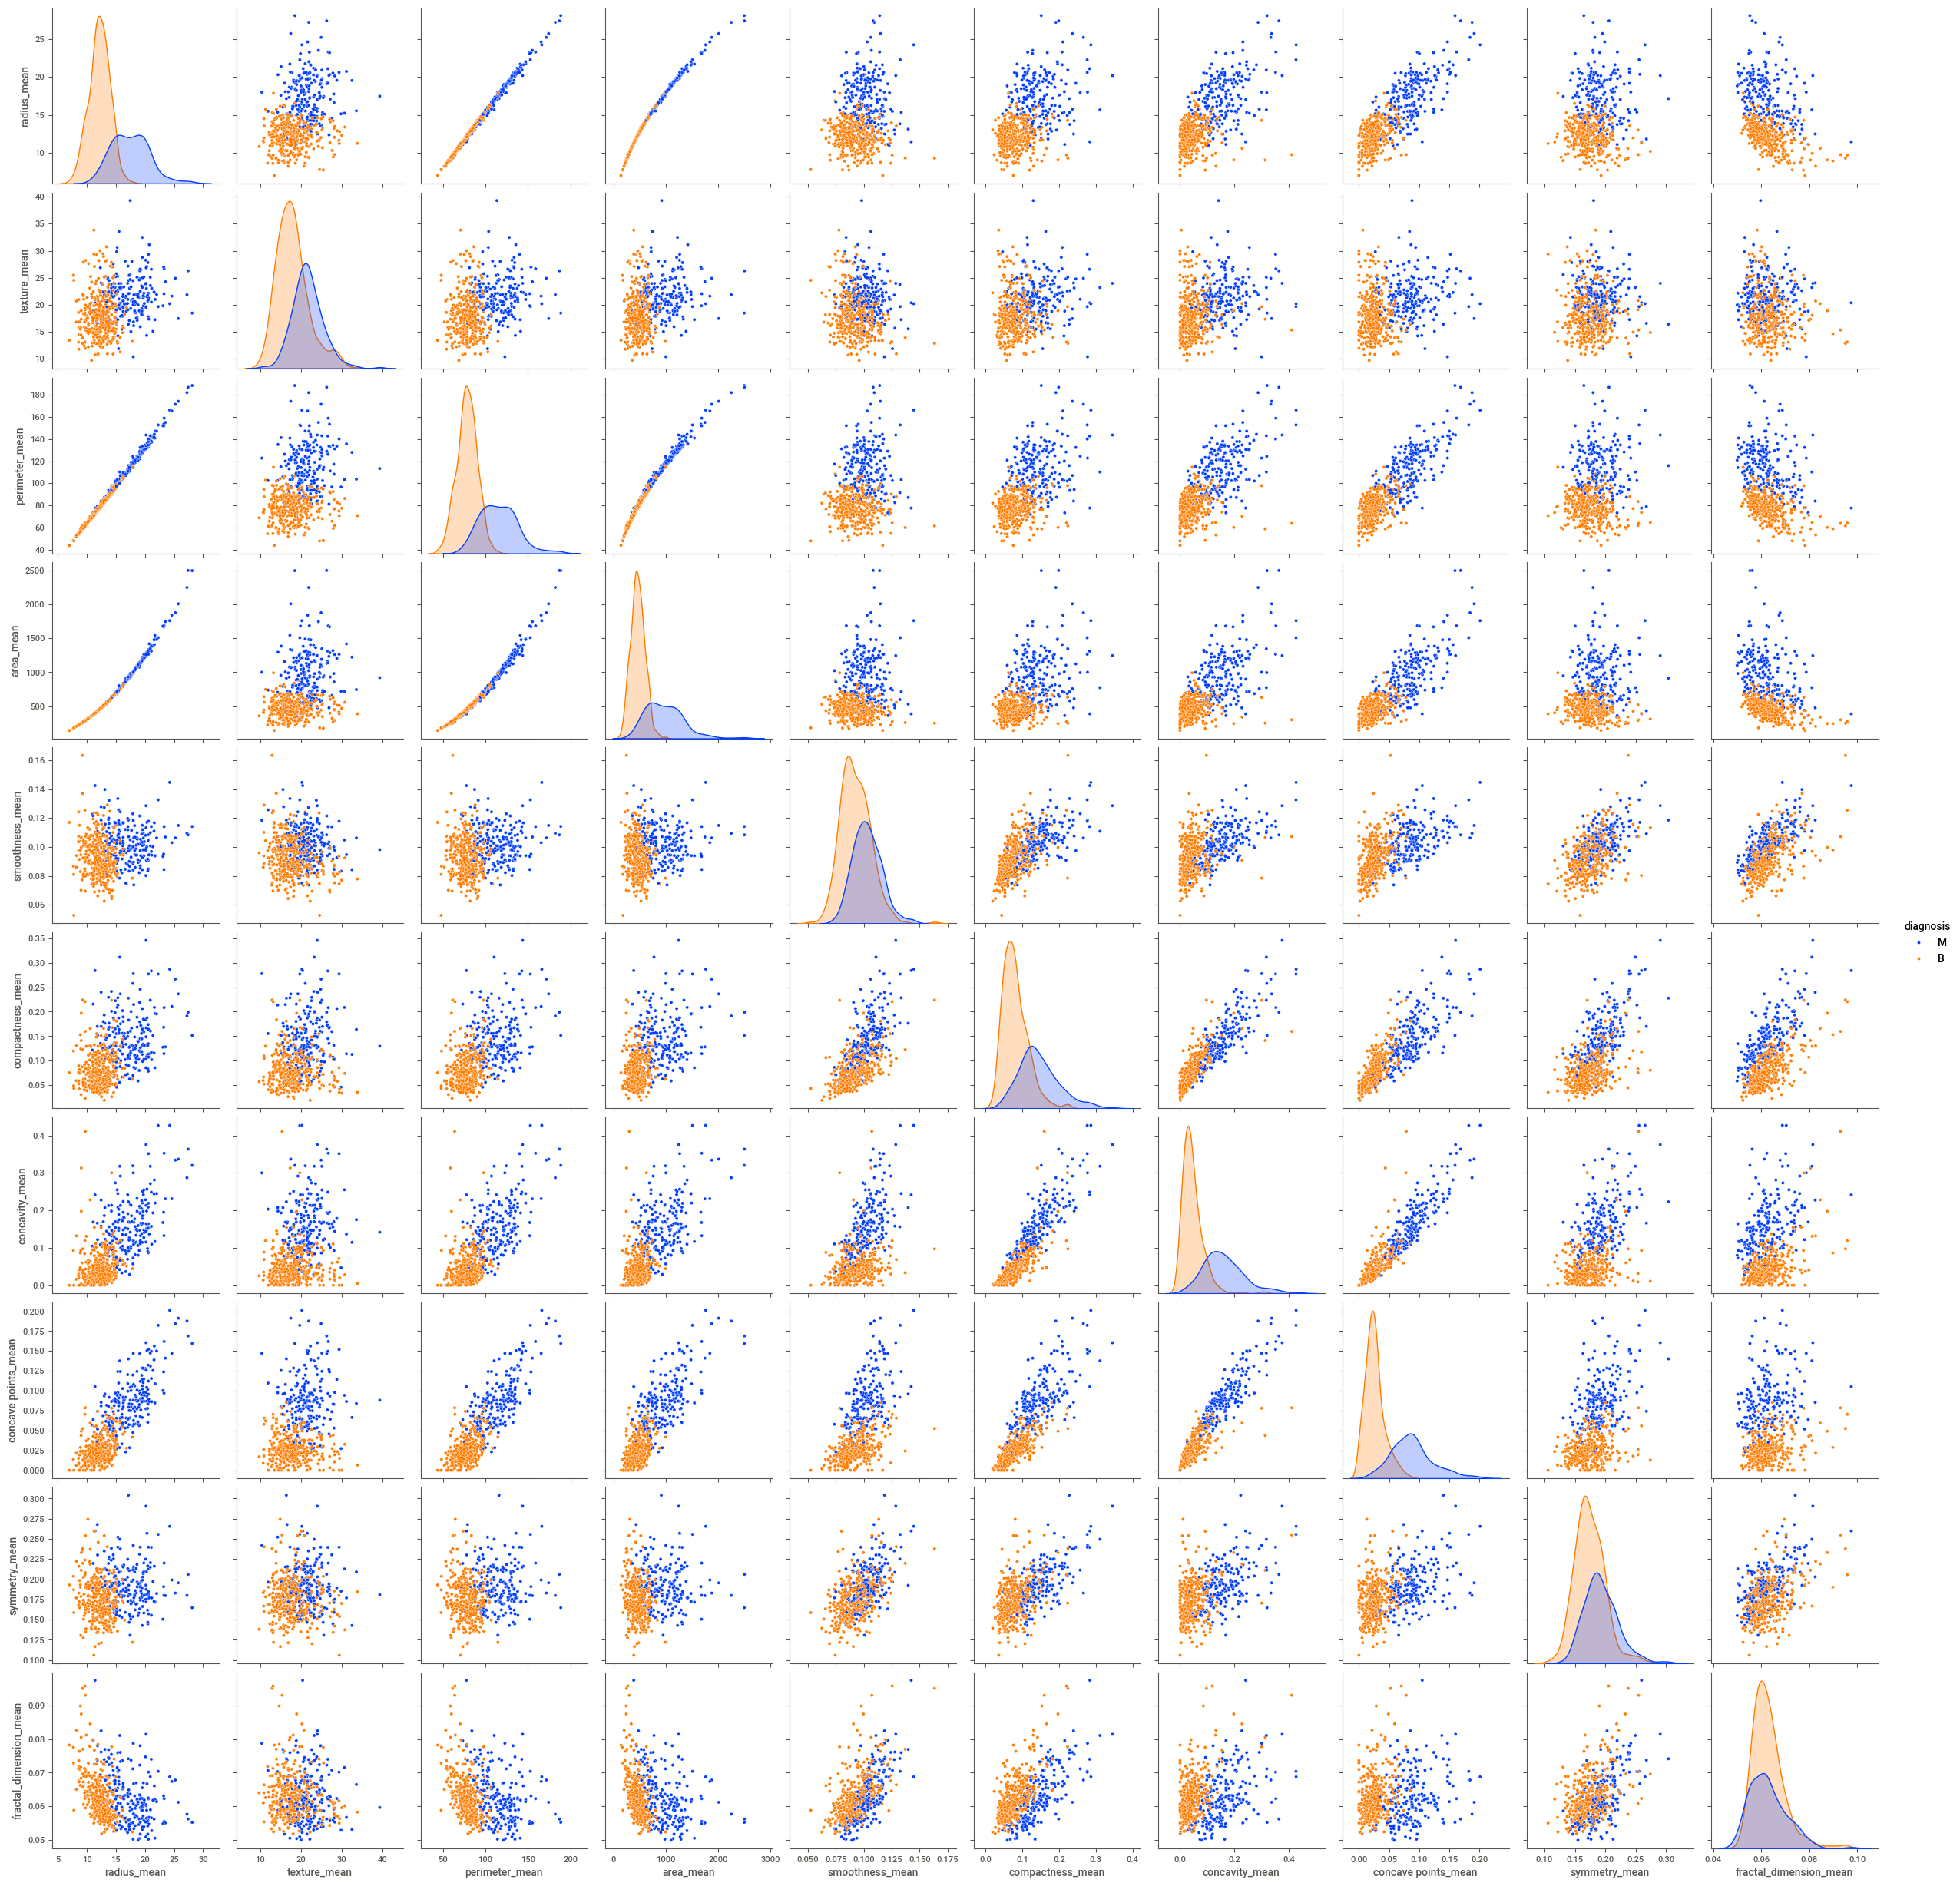

In [24]:
plt.figure(figsize = (20, 20))
sns.pairplot(data = data_mean , hue = 'diagnosis' , palette = 'bright')
plt.show()

<Figure size 2000x2000 with 0 Axes>

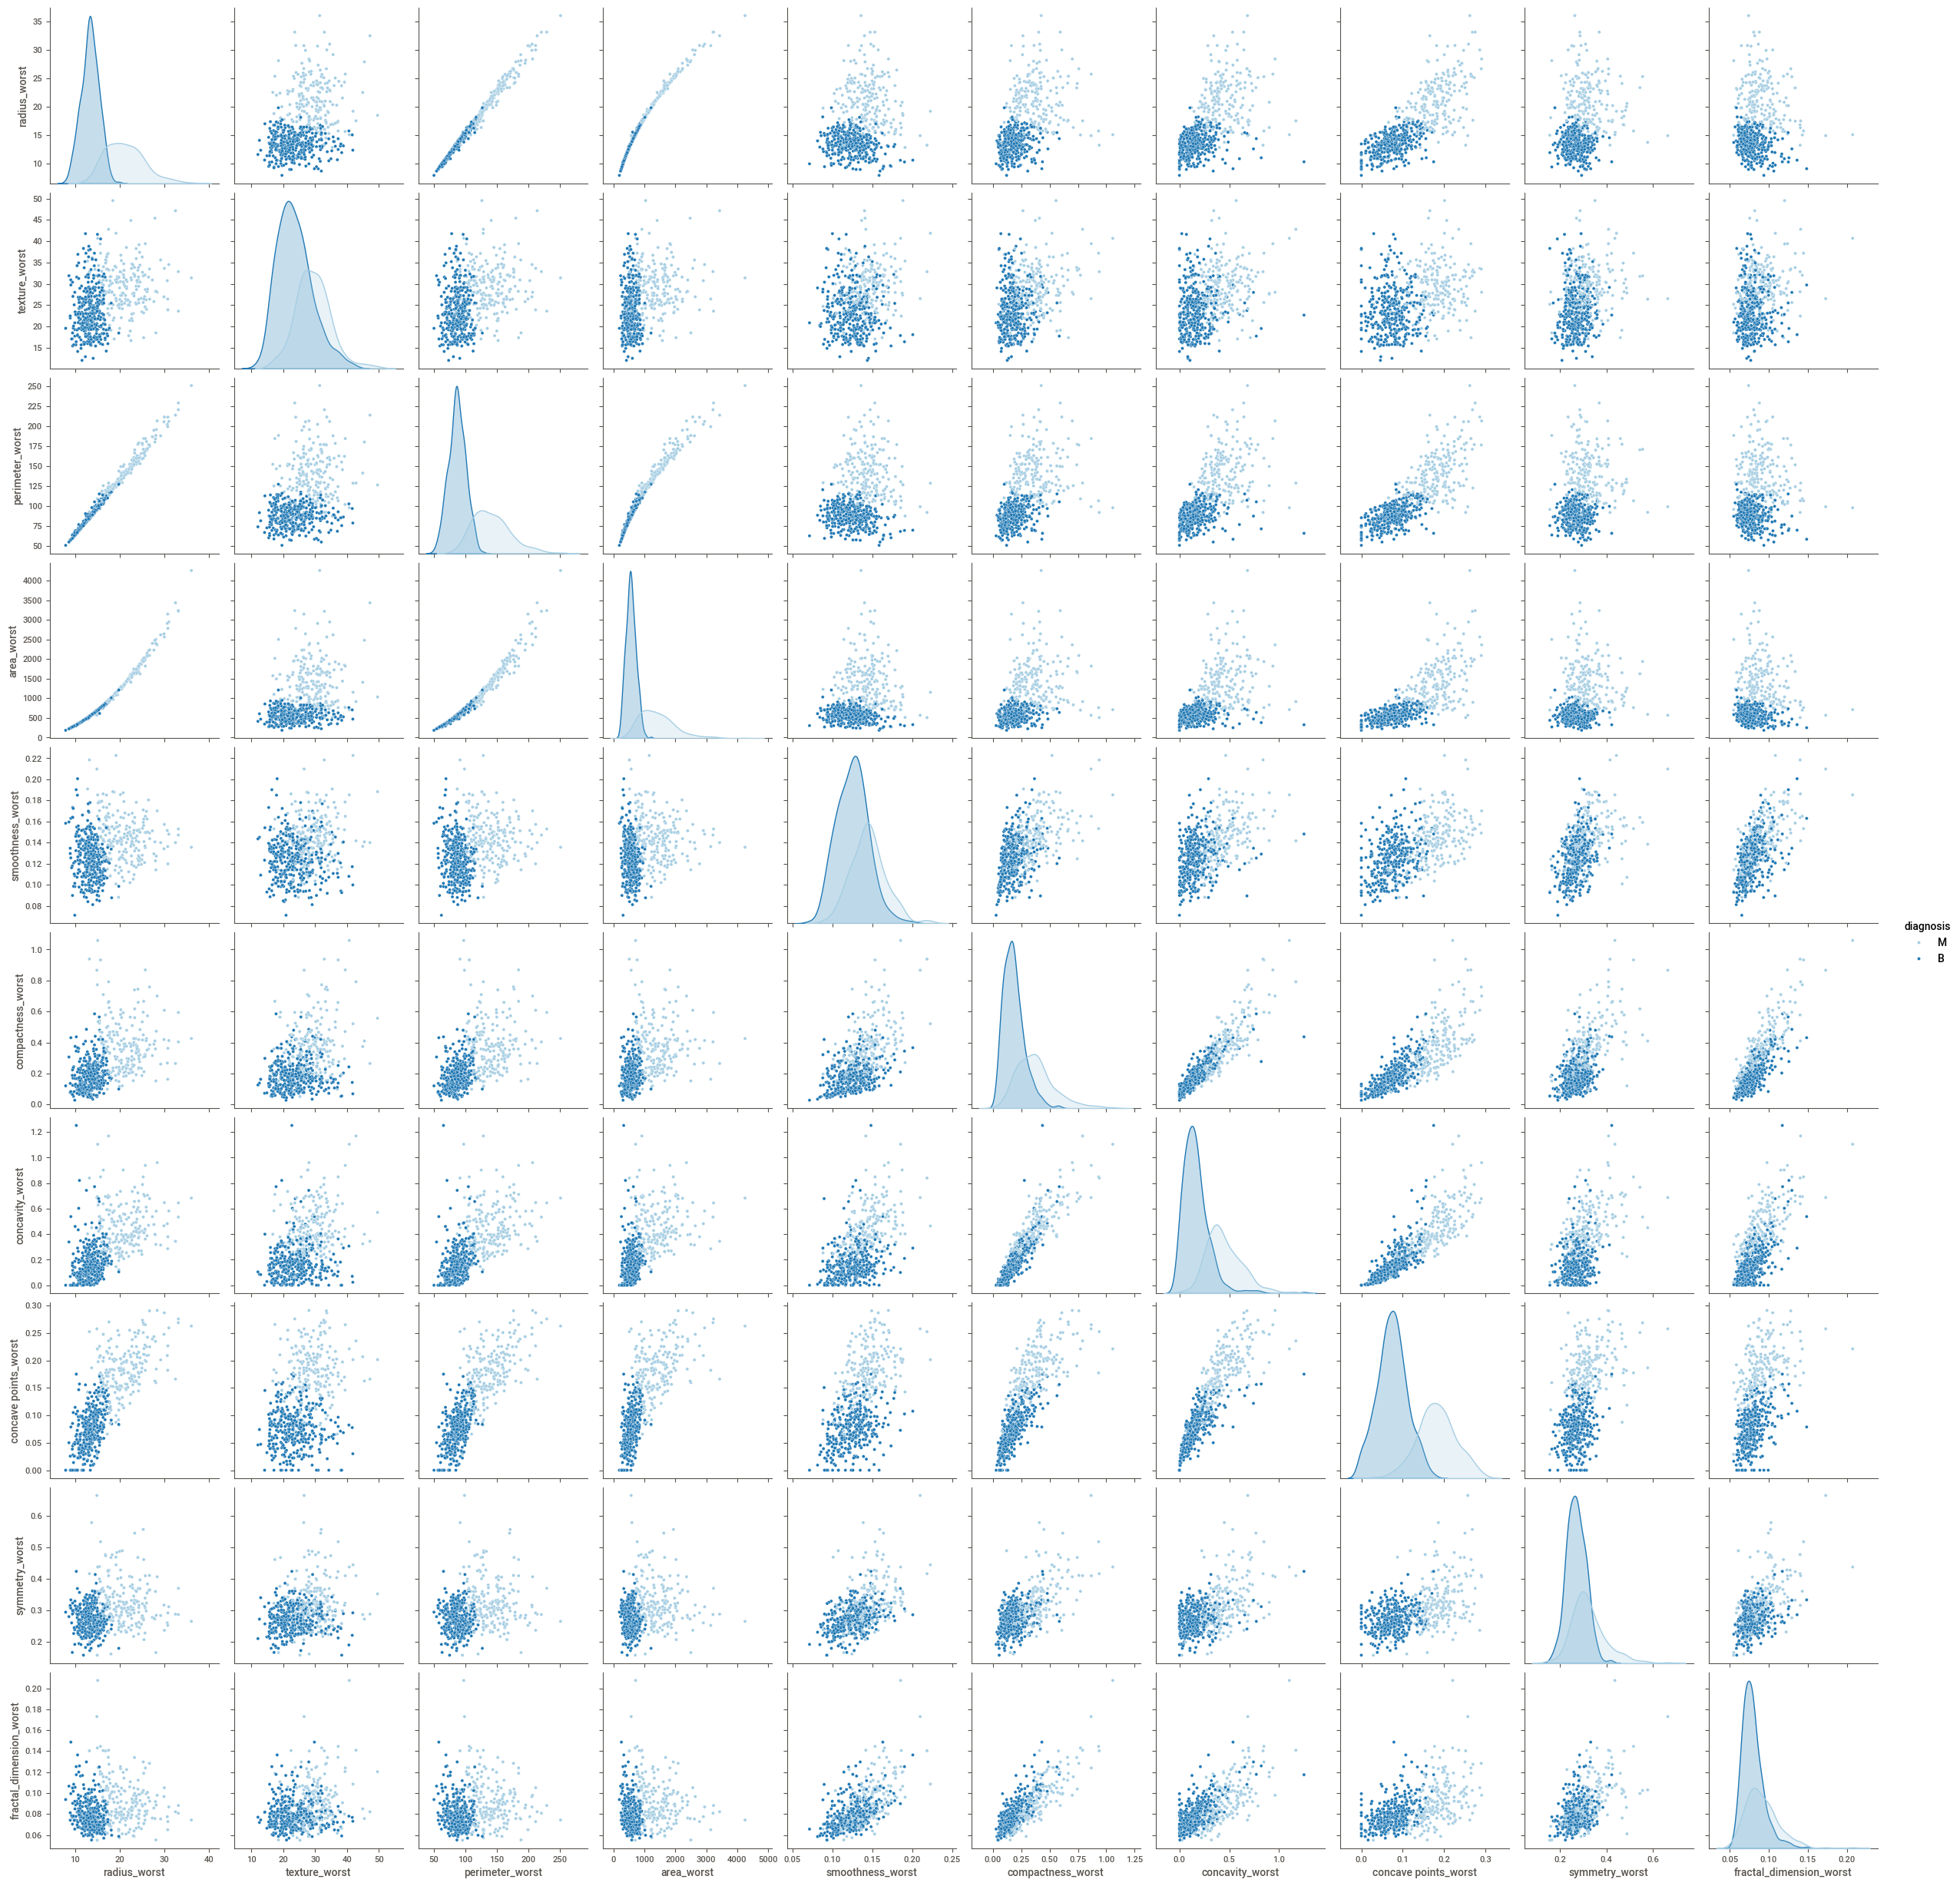

In [25]:
plt.figure(figsize = (20, 20))
sns.pairplot(data = data_worst , hue = 'diagnosis' , palette = 'Paired')
plt.show()

### Data Preprocessing and Feature Engineering.

In [26]:
data.duplicated().sum()

0

In [27]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [28]:
data['diagnosis'] = data['diagnosis'].map({'B' : 0 , 'M' : 1})

In [29]:
data['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [30]:
data

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   
1       1326.0          0.08474           0.07864         0.08690   
2       1203.0          0.10960           0.15990         0.19740   
3        386.1          0.14250           0.28390         0.24140   
4       1297.0          0.10030           0.13280         0.19800   
..         ...              ...               ...             ...   
564     1479.0          0.11100           0.11590         0.24390   
565     1261.0          0.09780           0.10340         0.14400   
566      858.1          0.08455           0.10230         0.09251   
567     1265.0          0.11780           0.27700         0.35140   
568      181.0          0.05263           0.04362         0.00000   

     concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                0.14710  ...        25.380          17.33           184.60   
1                0.07017  ...        24.990          23.41           158.80   
2                0.12790  ...        23.570          25.53           152.50   
3                0.10520  ...        14.910          26.50            98.87   
4                0.10430  ...        22.540          16.67           152.20   
..                   ...  ...           ...            ...              ...   
564              0.13890  ...        25.450          26.40           166.10   
565              0.09791  ...        23.690          38.25           155.00   
566              0.05302  ...        18.980          34.12           126.70   
567              0.15200  ...        25.740          39.42           184.60   
568              0.00000  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0

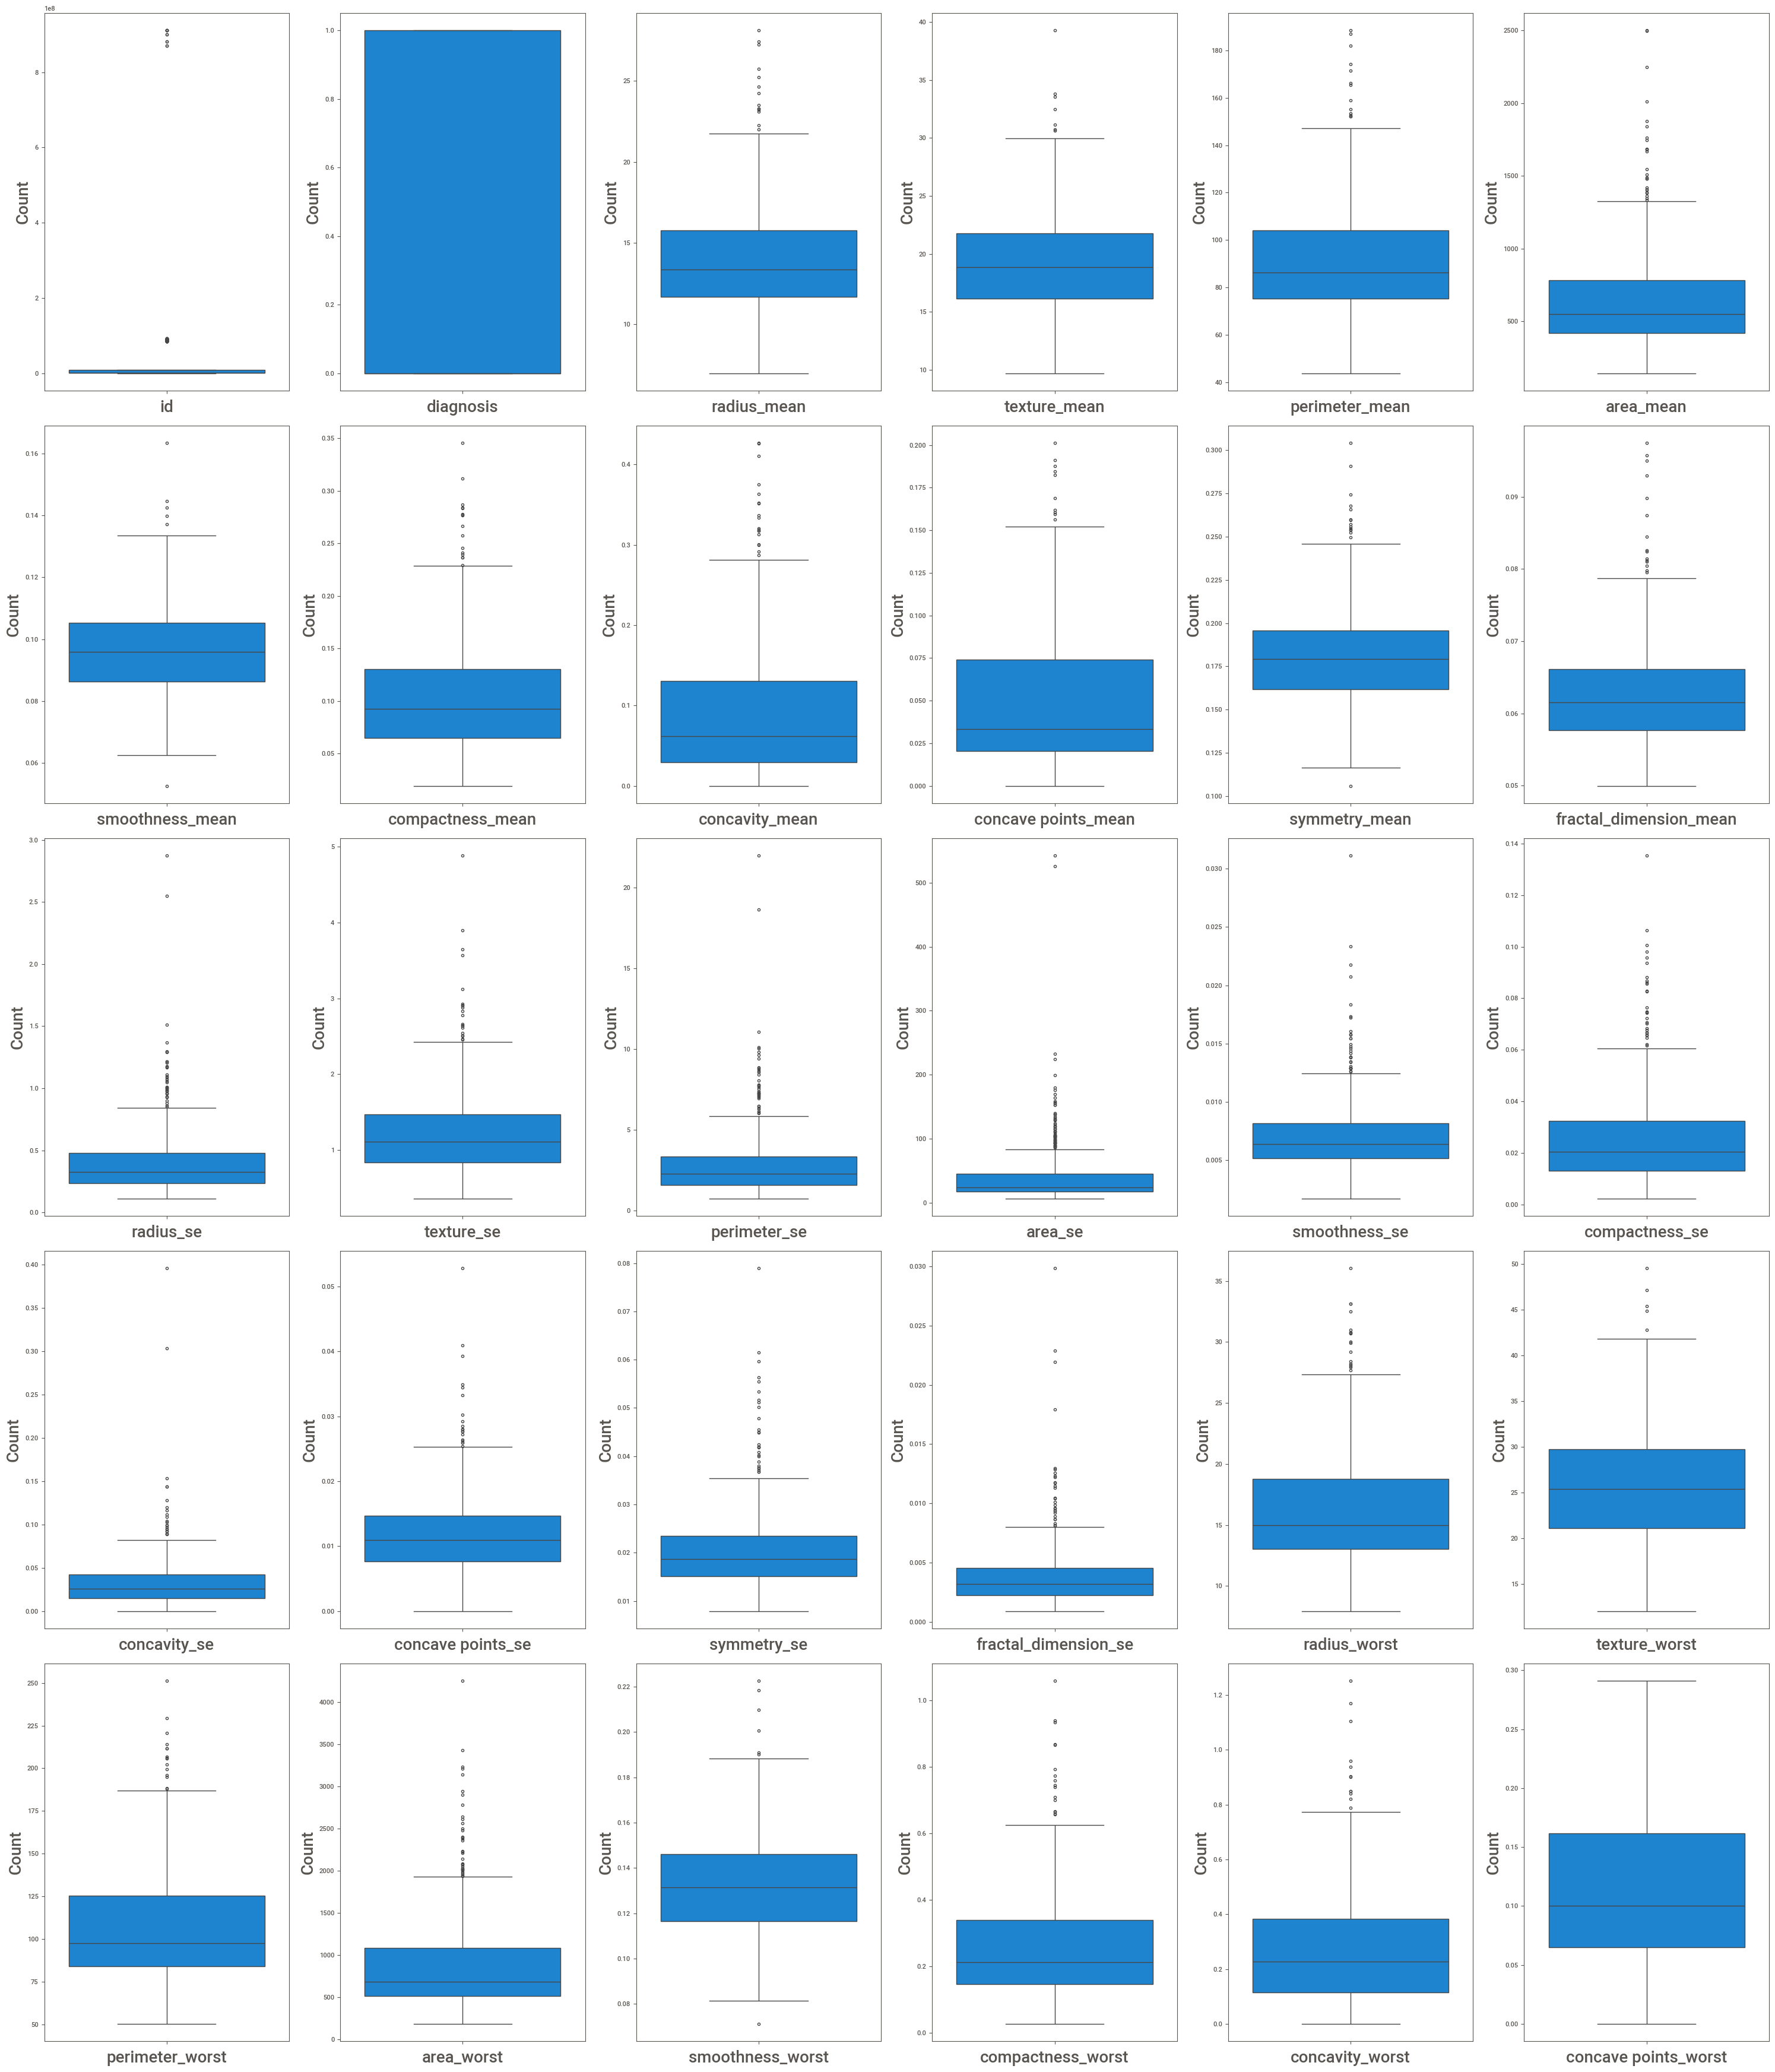

In [31]:
plt.figure(figsize=(30,35),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=30:
        ax=plt.subplot(5,6,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()


### Feature Selection

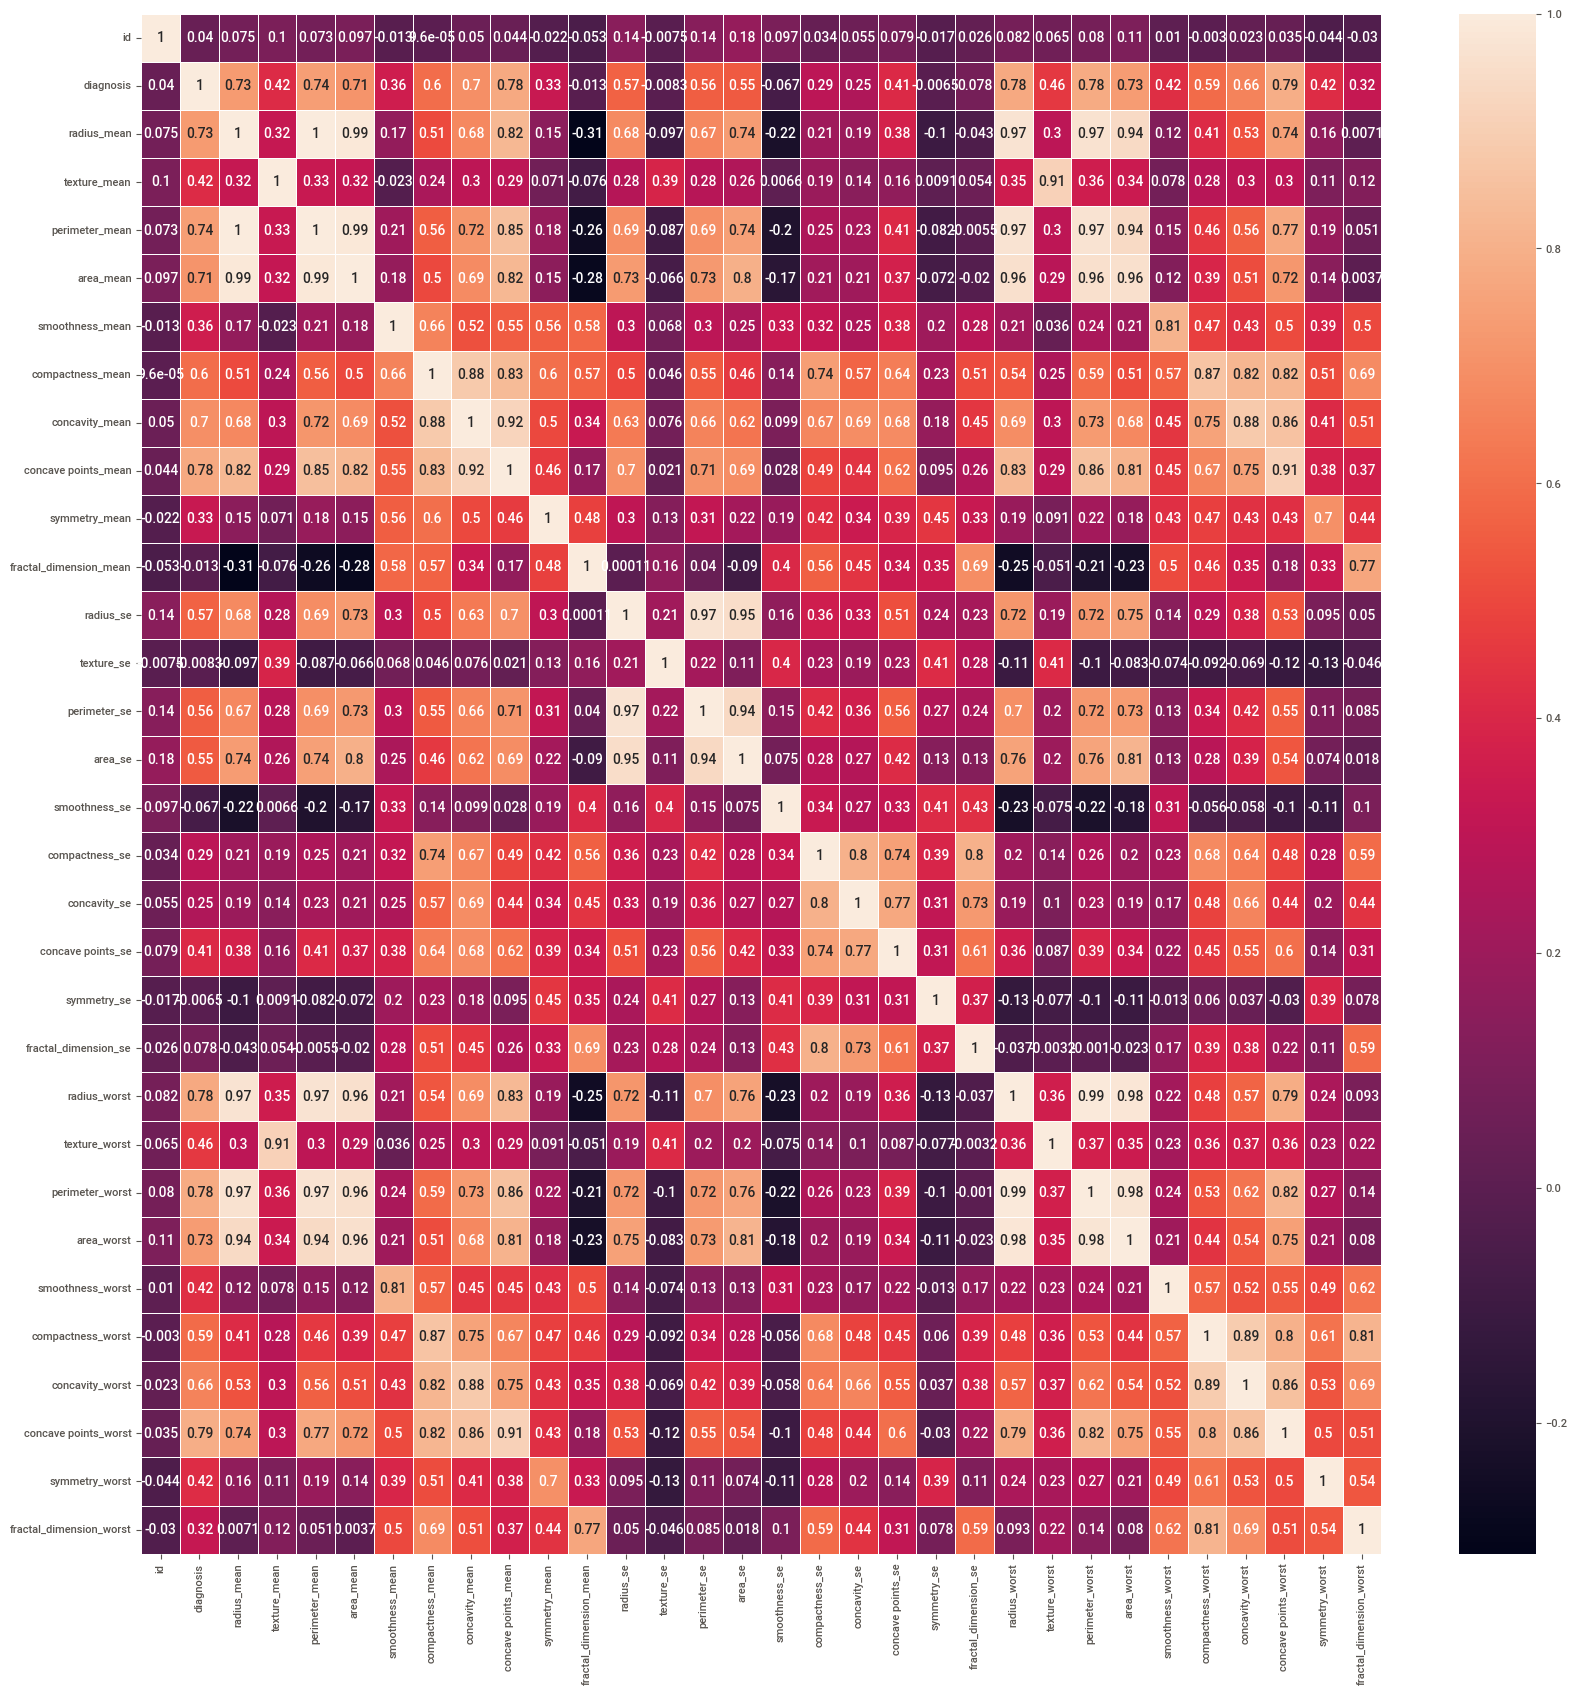

In [32]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,linewidth = 0.5)
plt.show()

In [33]:
data.corr()

id  diagnosis  radius_mean  texture_mean  \
id                       1.000000   0.039769     0.074626      0.099770   
diagnosis                0.039769   1.000000     0.730029      0.415185   
radius_mean              0.074626   0.730029     1.000000      0.323782   
texture_mean             0.099770   0.415185     0.323782      1.000000   
perimeter_mean           0.073159   0.742636     0.997855      0.329533   
area_mean                0.096893   0.708984     0.987357      0.321086   
smoothness_mean         -0.012968   0.358560     0.170581     -0.023389   
compactness_mean         0.000096   0.596534     0.506124      0.236702   
concavity_mean           0.050080   0.696360     0.676764      0.302418   
concave points_mean      0.044158   0.776614     0.822529      0.293464   
symmetry_mean           -0.022114   0.330499     0.147741      0.071401   
fractal_dimension_mean  -0.052511  -0.012838    -0.311631     -0.076437   
radius_se                0.143048   0.567134     0.679090      0.275869   
texture_se              -0.007526  -0.008303    -0.097317      0.386358   
perimeter_se             0.137331   0.556141     0.674172      0.281673   
area_se                  0.177742   0.548236     0.735864      0.259845   
smoothness_se            0.096781  -0.067016    -0.222600      0.006614   
compactness_se           0.033961   0.292999     0.206000      0.191975   
concavity_se             0.055239   0.253730     0.194204      0.143293   
concave points_se        0.078768   0.408042     0.376169      0.163851   
symmetry_se             -0.017306  -0.006522    -0.104321      0.009127   
fractal_dimension_se     0.025725   0.077972    -0.042641      0.054458   
radius_worst             0.082405   0.776454     0.969539      0.352573   
texture_worst            0.064720   0.456903     0.297008      0.912045   
perimeter_worst          0.079986   0.782914     0.965137      0.358040   
area_worst               0.107187   0.733825     0.941082      0.343546   
smoothness_worst         0.010338   0.421465     0.119616      0.077503   
compactness_worst       -0.002968   0.590998     0.413463      0.277830   
concavity_worst          0.023203   0.659610     0.526911      0.301025   
concave points_worst     0.035174   0.793566     0.744214      0.295316   
symmetry_worst          -0.044224   0.416294     0.163953      0.105008   
fractal_dimension_worst -0.029866   0.323872     0.007066      0.119205   

                         perimeter_mean  area_mean  smoothness_mean  \
id                             0.073159   0.096893        -0.012968   
diagnosis                      0.742636   0.708984         0.358560   
radius_mean                    0.997855   0.987357         0.170581   
texture_mean                   0.329533   0.321086        -0.023389   
perimeter_mean                 1.000000   0.986507         0.207278   
area_mean                      0.986507   1.000000         0.177028   
smoothness_mean                0.207278   0.177028         1.000000   
compactness_mean               0.556936   0.498502         0.659123   
concavity_mean                 0.716136   0.685983         0.521984   
concave points_mean            0.850977   0.823269         0.553695   
symmetry_mean                  0.183027   0.151293         0.557775   
fractal_dimension_mean        -0.261477  -0.283110         0.584792   
radius_se                      0.691765   0.732562         0.301467   
texture_se                    -0.086761  -0.066280         0.068406   
perimeter_se                   0.693135   0.726628         0.296092   
area_se                        0.744983   0.800086         0.246552   
smoothness_se                 -0.202694  -0.166777         0.332375   
compactness_se                 0.250744   0.212583         0.318943   
concavity_se                   0.228082   0.207660         0.248396   
concave points_se              0.407217   0.372320         0.380676   
symmetry_se                   -0.081629  -0.072497         0.200

In [34]:
data1=data.copy()

In [35]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data1[['id', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]=scaler.fit_transform(data1[['id', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']])

In [37]:
data1.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0 -0.236405          1     1.097064     -2.073335        1.269934   0.984375   
1 -0.236403          1     1.829821     -0.353632        1.685955   1.908708   
2  0.431741          1     1.579888      0.456187        1.566503   1.558884   
3  0.432121          1    -0.768909      0.253732       -0.592687  -0.764464   
4  0.432201          1     1.750297     -1.151816        1.776573   1.826229   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         1.568466          3.283515        2.652874             2.532475   
1        -0.826962         -0.487072       -0.023846             0.548144   
2         0.942210          1.052926        1.363478             2.037231   
3         3.283553          3.402909        1.915897             1.451707   
4         0.280372          0.539340        1.371011             1.428493   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...      1.886690      -1.359293         2.303601    2.001237   
1  ...      1.805927      -0.369203         1.535126    1.890489   
2  ...      1.511870      -0.023974         1.347475    1.456285   
3  ...     -0.281464       0.133984        -0.249939   -0.550021   
4  ...      1.298575      -1.466770         1.338539    1.220724   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0          1.307686           2.616665         2.109526              2.296076   
1         -0.375612          -0.430444        -0.146749              1.087084   
2          0.527407           1.082932         0.854974              1.955000   
3          3.394275           3.893397         1.989588              2.175786   
4          0.220556          -0.313395         0.613179              0.729259   

   symmetry_worst  fractal_dimension_worst  
0        2.750622                 1.937015  
1       -0.243890                 0.281190  
2        1.152255                 0.201391  
3        6.046041                 4.935010  
4       -0.868353                -0.397100  

[5 rows x 32 columns]

## Model Creation

In [38]:
x = data1.drop('diagnosis',axis = 1)
y = data1.diagnosis

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=14)

In [40]:
x_train.shape

(455, 31)

In [41]:
y_test.shape

(114,)

### Smote 

In [42]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [43]:
sm=SMOTE()
x_smote,y_smote=sm.fit_resample(x_train,y_train)

In [44]:
print('Actual value',Counter(y_train))
print('SMOTE value',Counter(y_smote))

Actual value Counter({0: 284, 1: 171})
SMOTE value Counter({0: 284, 1: 284})


# Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier()
dt1.fit(x_smote,y_smote)
dt_smote_pred = dt1.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
from sklearn.metrics import r2_score , mean_squared_error, mean_absolute_error

In [47]:
accuracy_score(y_test,dt_smote_pred)

0.9210526315789473

In [48]:
r2_score(y_test,dt_smote_pred)

0.657200133645172

In [49]:
print(classification_report(y_test,dt_smote_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        73
           1       0.92      0.85      0.89        41

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



# RandomForest

In [50]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier()
random.fit(x_smote,y_smote)
rf_smote_pred = random.predict(x_test)

In [51]:
accuracy_score(y_test,rf_smote_pred)

0.9473684210526315

In [52]:
r2_score(y_test,rf_smote_pred)

0.771466755763448

In [53]:
f1_Score=f1_score(y_test,rf_smote_pred)
f1_Score

0.925

# RandomForest RandomizedSearchCV

In [54]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_rgrs = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_rgrs, scoring='r2',param_distributions=random_grid, n_iter=80, cv=3,
                               verbose=1, random_state=42, n_jobs=-1)

rf_cv.fit(x_train, y_train)  
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})") 

Fitting 3 folds for each of 80 candidates, totalling 240 fits
Best paramters: {'n_estimators': 1600, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False})


In [55]:
rf_clf2 = RandomForestClassifier(n_estimators= 1600, min_samples_split= 5, 
                                 min_samples_leaf= 2, max_features= 'sqrt', 
                                 max_depth= 10, bootstrap= False)
rf_clf2.fit(x_train, y_train)
y_predict=rf_clf2.predict(x_test)
x=f1_score(y_test,y_predict)

In [56]:
x

0.9382716049382716

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
lr_predict=LR.predict(x_test)

In [ ]:
accuracy_score(y_test,lr_predict)

0.9912280701754386

In [ ]:
r2_score(y_test,lr_predict)

0.9619111259605747

In [ ]:
mean_squared_error(y_test,lr_predict)

0.008771929824561403

In [ ]:
print(classification_report(y_test,lr_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        73
           1       1.00      0.98      0.99        41

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [ ]:
LR.fit(x_smote,y_smote)
lr_smote_pred=LR.predict(x_test)

In [ ]:
accuracy_score(y_test,lr_smote_pred)

0.9912280701754386

In [ ]:
r2_score(y_test,lr_smote_pred)

0.9619111259605747

# XGB boosting

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)

In [ ]:
accuracy_score(y_test,xgb_pred)

0.9736842105263158

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier( hidden_layer_sizes=(50,3),
                       learning_rate_init=0.1,
                       max_iter=100,
                       random_state=2) 
model.fit(x_train,y_train) 
y_predict_proba = model.predict_proba(x_test) 
y_predict = model.predict(x_test)
y_train_predict = model.predict(x_train)

In [ ]:
y_predict_proba

array([[0.00000000e+00, 1.00000000e+00],
       [9.99835943e-01, 1.64057448e-04],
       [9.92541723e-01, 7.45827714e-03],
       [0.00000000e+00, 1.00000000e+00],
       [9.99397807e-01, 6.02193406e-04],
       [9.45984173e-01, 5.40158272e-02],
       [9.99903295e-01, 9.67050500e-05],
       [9.99999995e-01, 4.85222741e-09],
       [9.99973773e-01, 2.62265216e-05],
       [1.00000000e+00, 1.51205868e-11],
       [9.99999943e-01, 5.65040866e-08],
       [6.50401715e-01, 3.49598285e-01],
       [9.99989759e-01, 1.02405141e-05],
       [0.00000000e+00, 1.00000000e+00],
       [9.99998772e-01, 1.22801018e-06],
       [9.99998482e-01, 1.51824687e-06],
       [8.43769499e-15, 1.00000000e+00],
       [3.85380038e-03, 9.96146200e-01],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [9.99936670e-01, 6.33298293e-05],
       [2.04070501e-03, 9.97959295e-01],
       [9.99782380e-01, 2.17620303e-04],
       [0.000000

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_train_predict))
print("Test accuracy :",accuracy_score(y_test,y_predict))

Train accuracy : 0.978021978021978
Test accuracy : 0.9736842105263158


In [ ]:
from sklearn.model_selection import cross_val_score
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "XGB boosting" : XGBClassifier()
}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, x_smote, y_smote, cv=5) 
    print(f"{model_name}:")
    print(f"  Cross-validation scores: {cv_scores}")
    print(f"  Mean cross-validation score: {cv_scores.mean():.4f}\n")

Logistic Regression:
  Cross-validation scores: [0.97368421 0.97368421 0.97368421 0.97345133 0.99115044]
  Mean cross-validation score: 0.9771

Random Forest:
  Cross-validation scores: [0.94736842 0.96491228 0.98245614 0.95575221 0.96460177]
  Mean cross-validation score: 0.9630

DecisionTreeClassifier:
  Cross-validation scores: [0.92982456 0.92982456 0.92982456 0.95575221 0.96460177]
  Mean cross-validation score: 0.9420

XGB boosting:
  Cross-validation scores: [0.95614035 0.95614035 0.94736842 0.95575221 0.96460177]
  Mean cross-validation score: 0.9560



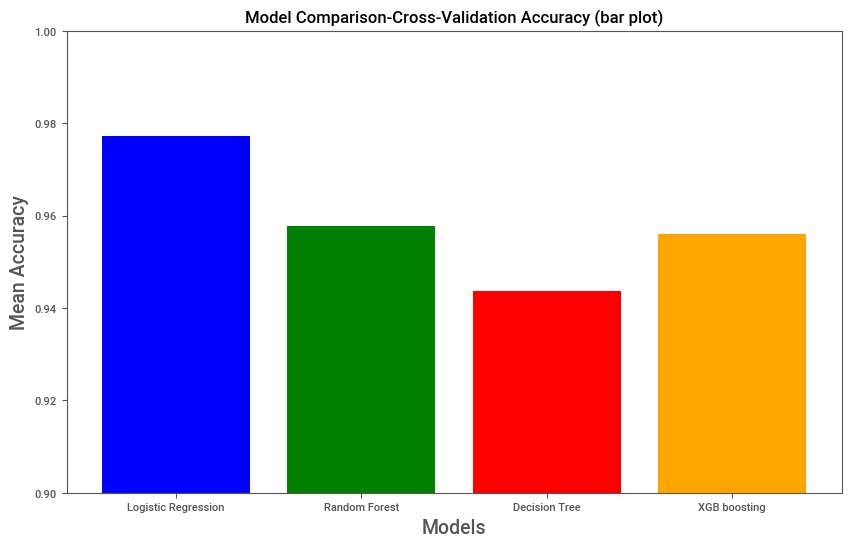

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
   "Decision Tree" : DecisionTreeClassifier(),
    "XGB boosting" : XGBClassifier()
}
model_names = []
mean_accuracies = []
colors = ['blue','green','red','orange']
for model_name, model in models.items():
    cv_scores = cross_val_score(model, x_smote, y_smote, cv=5)  
    model_names.append(model_name)
    mean_accuracies.append(cv_scores.mean()) 
plt.figure(figsize=(10,6))
plt.bar(model_names, mean_accuracies, color=colors)
plt.title('Model Comparison-Cross-Validation Accuracy (bar plot)', fontsize=12)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Mean Accuracy', fontsize=14)
plt.ylim(0.9, 1.0)
plt.show()